# COMP0120 Project - Support Vector Machines (SVMs)
## John Duffy, Student Number: 19154676
## Project Code


In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Load Iris dataset.

from sklearn import datasets

iris = datasets.load_iris()

X = iris["data"]
y = iris["target"]
y_names = iris["target_names"]

### Introduction

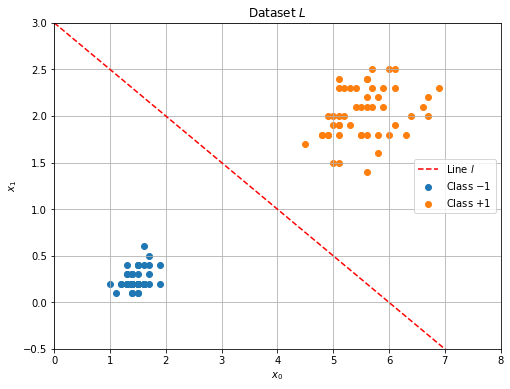

In [23]:
# intro_0.pdf

labels = ["Class $-1$", "Class $+1$"]
plt.figure(figsize=(8, 6))
plt.xlim(0, 8)
plt.ylim(-0.5, 3)
for i, value in enumerate([0, 2]):
    plt.scatter(X[y == value, 2], X[y == value, 3], label=labels[i])
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 3.0
x1 = m * x0 + c
plt.plot(x0, x1, "--r", label="Line $l$")
plt.title("Dataset $L$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(loc="center right")
plt.grid()
plt.savefig("intro_0.pdf")
plt.show()

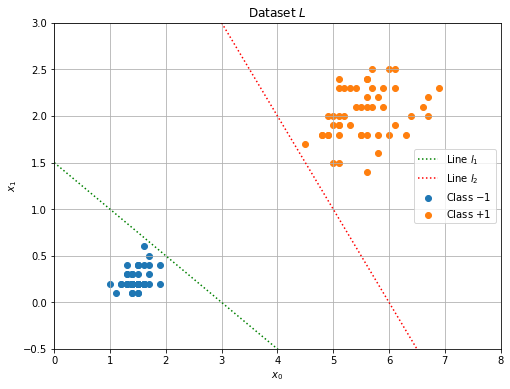

In [24]:
# intro_02.pdf

labels = ["Class $-1$", "Class $+1$"]
plt.figure(figsize=(8, 6))
plt.xlim(0, 8)
plt.ylim(-0.5, 3)
for i, value in enumerate([0, 2]):
    plt.scatter(X[y == value, 2], X[y == value, 3], label=labels[i])
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 1.5
x1 = m * x0 + c
plt.plot(x0, x1, ":g", label="Line $l_1$")
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -1
c = 6
x1 = m * x0 + c
plt.plot(x0, x1, ":r", label="Line $l_2$")
plt.title("Dataset $L$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(loc="center right")
plt.grid()
plt.savefig("intro_1.pdf")
plt.show()

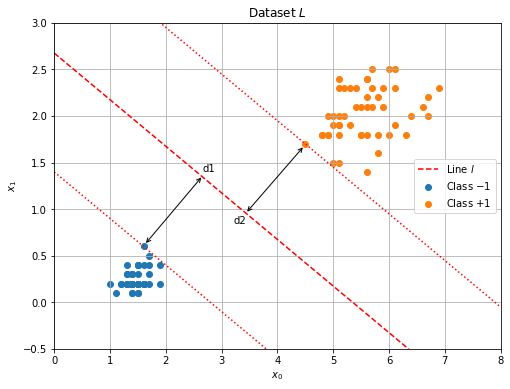

In [72]:
# intro_03.pdf

labels = ["Class $-1$", "Class $+1$"]

plt.figure(figsize=(8, 6))
plt.xlim(0, 8)
plt.ylim(-0.5, 3)

for i, value in enumerate([0, 2]):
    plt.scatter(X[y == value, 2], X[y == value, 3], label=labels[i])

x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 1.4
x1 = m * x0 + c
plt.plot(x0, x1, ":r")

x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 3.95
x1 = m * x0 + c
plt.plot(x0, x1, ":r")

x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 2.675
x1 = m * x0 + c
plt.plot(x0, x1, "--r", label="Line $l$")

#plt.annotate("", xy=(0.80, 1.0), xytext=(2.9, 2.5), arrowprops=dict(arrowstyle="<->"))

plt.annotate("d1", xy=(1.62, 0.62), xytext=(2.65, 1.4), arrowprops=dict(arrowstyle="<->"))
plt.annotate("d2", xy=(4.48, 1.68), xytext=(3.21, 0.85), arrowprops=dict(arrowstyle="<->"))

plt.title("Dataset $L$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(loc="center right")
plt.grid()
plt.savefig("intro_2.pdf")
plt.show()

### Mathematical Setting

#### Linear Binary Classification

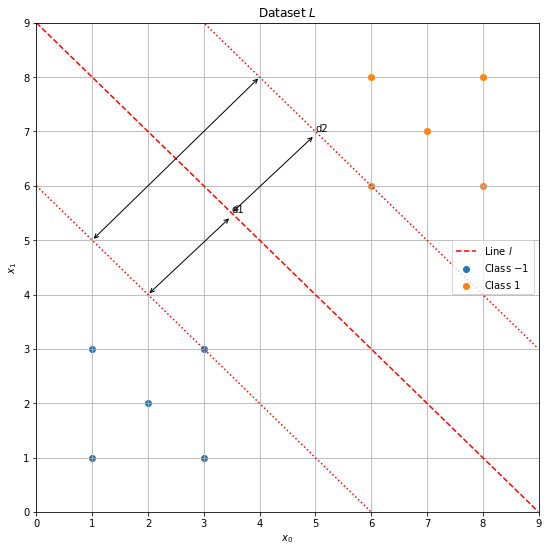

In [19]:
# linear_binary_0.pdf

plt.figure(figsize=(9, 9))
plt.xlim(0, 9)
plt.ylim(0, 9)

X = np.array([[1.0, 1.0], [1.0, 3.0], [2.0, 2.0], [3.0, 1.0], [3.0, 3.0],
              [6.0, 6.0], [6.0, 8.0], [8.0, 6.0], [8.0, 8.0], [7.0, 7.0]],
             dtype=np.float64)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
y_names = ["Class $-1$", "Class $1$"]

for i in np.sort(np.unique(y)):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=y_names[i])

x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -1.0
c = 9.0
x1 = m * x0 + c
plt.plot(x0, x1, "--r", label="Line $l$")

x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -1.0
c = 6.0
x1 = m * x0 + c
plt.plot(x0, x1, ":r")

x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -1.0
c = 12.0
x1 = m * x0 + c
plt.plot(x0, x1, ":r")

plt.annotate("", xy=(1.0, 5.0), xytext=(4.0, 8.0), arrowprops=dict(arrowstyle="<->"))
plt.annotate("d1", xy=(2.0, 4.0), xytext=(3.5, 5.5), arrowprops=dict(arrowstyle="<->"))
plt.annotate("d2", xy=(3.5, 5.5), xytext=(5.0, 7.0), arrowprops=dict(arrowstyle="<->"))

plt.title("Dataset $L$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(loc="center right")
plt.grid(zorder=0)
plt.savefig("linear_binary_0.pdf")
plt.show()

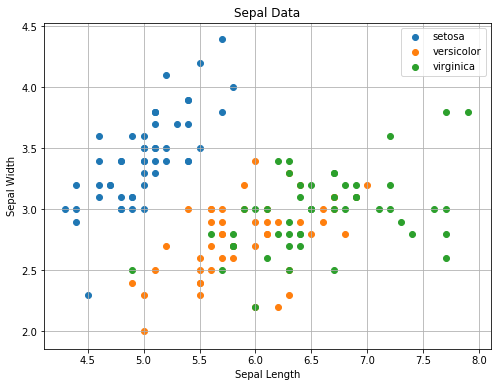

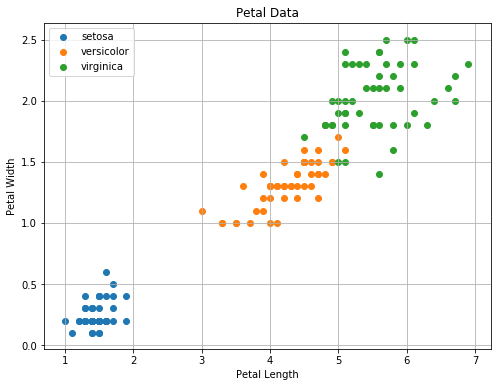

In [2]:
# Sepal Data
plt.figure(figsize=(8, 6))
for i in np.sort(np.unique(y)):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=y_names[i])
plt.title("Sepal Data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.grid(zorder=0)
plt.savefig("iris_sepal.pdf")
plt.show()

# Petal Data
plt.figure(figsize=(8, 6))
for i in np.sort(np.unique(y)):
    plt.scatter(X[y == i, 2], X[y == i, 3], label=y_names[i])
plt.title("Petal Data")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid(zorder=0)
plt.savefig("iris_petal.pdf")
plt.show()

In [20]:
plt.figure(figsize=(8, 6))
for i in np.sort(np.unique(y)):
    plt.scatter(X[y == i, 2], X[y == i, 3], label=y_names[i])
x = np.arange(1, 7, 0.01)
m = -1
c = 2.5
y = m * x + c
plt.plot(x, y)
plt.title("Petal Data")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid()
plt.savefig("iris_petal.pdf")
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 150 but corresponding boolean dimension is 600

<Figure size 576x432 with 0 Axes>

In [59]:
a = (1,2)

In [60]:
a

(1, 2)

In [63]:
a[1]

2